# Data Mining Assignment 1
## Part 1: Programming

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# import tree stuff
from main import tree_grow, tree_pred, tree_grow_b, tree_pred_b, print_tree

## Loading in the datasets
### loading in the train data

In [2]:
df_train = pd.read_csv("./data/eclipse-metrics-packages-2.0.csv", sep=";")

# set the columns to select
columns = ['pre', 'post', 'ACD_avg', 'ACD_max', 'ACD_sum',
       'FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum',
       'NBD_avg', 'NBD_max', 'NBD_sum', 'NOCU', 'NOF_avg', 'NOF_max',
       'NOF_sum', 'NOI_avg', 'NOI_max', 'NOI_sum', 'NOM_avg', 'NOM_max',
       'NOM_sum', 'NOT_avg', 'NOT_max', 'NOT_sum', 'NSF_avg', 'NSF_max',
       'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max',
       'PAR_sum', 'TLOC_avg', 'TLOC_max', 'TLOC_sum', 'VG_avg', 'VG_max',
       'VG_sum']

# Select the needed columns, corresponding to Table 1 of the paper
selected_df = df_train[df_train.columns.intersection(columns)]

X_train = selected_df.drop("post", axis=1)
X_train = X_train.to_numpy()

y_train = selected_df["post"]
# Transform the labels to binary, 0 if no bug, 1 if bug
y_train = np.where(y_train > 0, 1, 0)

print(f"Number of bugs in the training set: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.0f}%)")
X_train.shape, y_train.shape

Number of bugs in the training set: 190 (50%)


((377, 41), (377,))

### loading in the test data

In [3]:
df_test = pd.read_csv("./data/eclipse-metrics-packages-3.0.csv", sep=";")

# Select the needed columns, corresponding to Table 1 of the paper
selected_df = df_test[df_test.columns.intersection(columns)]

X_test = selected_df.drop("post", axis=1)
X_test = X_test.to_numpy()

y_test = selected_df["post"]
# Transform the labels to binary, 0 if no bug, 1 if bug
y_test = np.where(y_test > 0, 1, 0)

X_test.shape, y_test.shape

((661, 41), (661,))

### Single classification tree
with $nmin=15$ and $minleaf=5$

In [4]:
# single classification tree, trained on 2.0, tested on 3.0
# # train the tree
tree = tree_grow(X_train, y_train, nmin=15, minleaf=5, nfeat=X_train.shape[1])

# # make the predictions
y_pred = tree_pred(X_test, tree)

# Calculate Precision, Recall and Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, Accuracy: {accuracy:.3f}")

Precision: 0.693, Recall: 0.591, Accuracy: 0.682


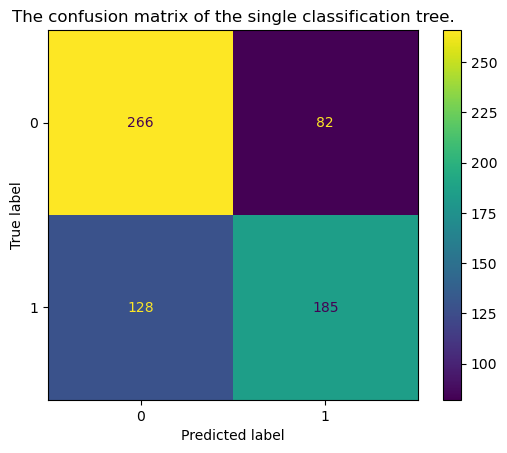

In [5]:
# print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

cm_display.plot()
plt.title("The confusion matrix of the single classification tree.")
plt.show()

In [6]:
# remove 'post' from the columns
xcols = [x for x in columns if x != "post"]

# print the first two decisions made by the tree
print(print_tree(tree.root, max_depth=4, columns=xcols))

feature: pre <= 4.5; distr: [187 190]
	feature: VG_max <= 26.5; distr: [156  58]
		feature: NSM_sum <= 54.5; distr: [150  41]
			feature: FOUT_sum <= 143.0; distr: [149  34]
			feature: FOUT_sum > 143.0; distr: [149  34]
		feature: NSM_sum > 54.5; distr: [150  41]
			class: 1; distr: [1 7]
	feature: VG_max > 26.5; distr: [156  58]
		feature: VG_sum <= 358.0; distr: [ 6 17]
			class: 0; distr: [5 5]
		feature: VG_sum > 358.0; distr: [ 6 17]
			class: 1; distr: [ 1 12]
feature: pre > 4.5; distr: [187 190]
	feature: NOT_avg <= 0.8416666666666667; distr: [ 31 132]
		feature: NOCU <= 9.5; distr: [20 25]
			class: 0; distr: [11  2]
		feature: NOCU > 9.5; distr: [20 25]
			feature: FOUT_avg <= 2.2017268596950563; distr: [ 9 23]
			feature: FOUT_avg > 2.2017268596950563; distr: [ 9 23]
	feature: NOT_avg > 0.8416666666666667; distr: [ 31 132]
		feature: pre <= 11.5; distr: [ 11 107]
			feature: FOUT_avg <= 4.144095167405565; distr: [10 34]
			feature: FOUT_avg > 4.144095167405565; distr: [10 34

### Using bagging
with $nmin=15$, $minleaf=5$, and $m=100$

In [7]:
# single classification tree, trained on 2.0, tested on 3.0
# # train the tree
trees = tree_grow_b(X_train, y_train, nmin=15, minleaf=5, nfeat=X_train.shape[1], m=100)

# # make the predictions
y_pred = tree_pred_b(X_test, trees)

# Calculate Precision, Recall and Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, Accuracy: {accuracy:.3f}")

Precision: 0.809, Recall: 0.661, Accuracy: 0.766


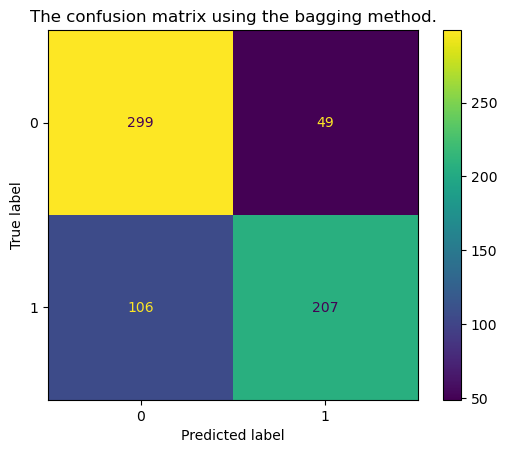

In [8]:
# print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

cm_display.plot()
plt.title("The confusion matrix using the bagging method.")
plt.show()

### Using Random Forests
with $nmin=15$, $minleaf=5$, $m=100$, and $nfeat=6$

In [9]:
# single classification tree, trained on 2.0, tested on 3.0
# train the tree
trees = tree_grow_b(X_train, y_train, nmin=15, minleaf=5, nfeat=6, m=100)

# make the predictions
y_pred = tree_pred_b(X_test, trees)

# Calculate Precision, Recall and Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, Accuracy: {accuracy:.3f}")

Precision: 0.766, Recall: 0.700, Accuracy: 0.756


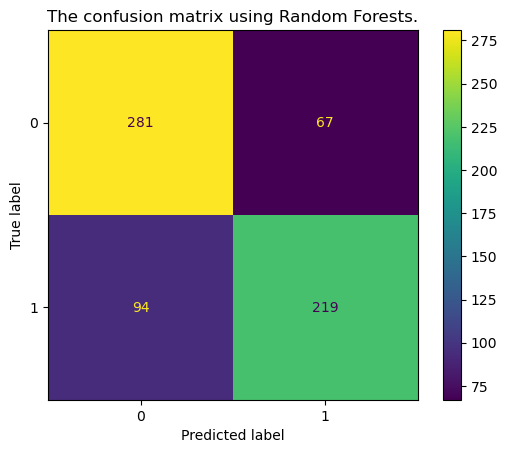

In [10]:
# print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

cm_display.plot()
plt.title("The confusion matrix using Random Forests.")
plt.show()